In [ ]:
%pip install tensorflow
%pip install keras

In [103]:
trainingimage = "/home/wasiq/Downloads/Mask/train/"
testimage = "/home/wasiq/Downloads/Mask/test/"

In [104]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [108]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    height_shift_range = 0.1,
    width_shift_range=0.1,
    brightness_range=(0.5,1.5),
    zoom_range = [1, 1.5]
)
# Test data generator (no augmentation, only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [110]:
# Load training data
training_set = train_datagen.flow_from_directory(
    directory=trainingimage,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 9737 images belonging to 9737 classes.


In [111]:
# Load testing data
testing_set = test_datagen.flow_from_directory(
    directory=testimage,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 9608 images belonging to 9608 classes.


In [112]:
# Check class indices
print("Class indices:", testing_set.class_indices)
trainClasses = training_set.class_indices
print("Training classes:", trainClasses)

Class indices: {'img_1': 0, 'img_10': 1, 'img_100': 2, 'img_1000': 3, 'img_1001': 4, 'img_1002': 5, 'img_1003': 6, 'img_1004': 7, 'img_1005': 8, 'img_1006': 9, 'img_1007': 10, 'img_1008': 11, 'img_1009': 12, 'img_101': 13, 'img_1010': 14, 'img_1011': 15, 'img_1012': 16, 'img_1013': 17, 'img_1014': 18, 'img_1015': 19, 'img_1016': 20, 'img_1017': 21, 'img_1018': 22, 'img_1019': 23, 'img_102': 24, 'img_1020': 25, 'img_1021': 26, 'img_1022': 27, 'img_1023': 28, 'img_1024': 29, 'img_1025': 30, 'img_1026': 31, 'img_1027': 32, 'img_1028': 33, 'img_1029': 34, 'img_103': 35, 'img_1030': 36, 'img_1031': 37, 'img_1032': 38, 'img_1033': 39, 'img_1034': 40, 'img_1035': 41, 'img_1036': 42, 'img_1037': 43, 'img_1038': 44, 'img_1039': 45, 'img_104': 46, 'img_1040': 47, 'img_1041': 48, 'img_1042': 49, 'img_1043': 50, 'img_1044': 51, 'img_1045': 52, 'img_1046': 53, 'img_1047': 54, 'img_1048': 55, 'img_1049': 56, 'img_105': 57, 'img_1050': 58, 'img_1051': 59, 'img_1052': 60, 'img_1053': 61, 'img_1054': 6

In [70]:
ResultMap={}
for faceValue,faceName in trainClasses.items():
    ResultMap[faceName]=faceValue

In [113]:
# Create result map
ResultMap = {}
for faceValue, faceName in trainClasses.items():
    ResultMap[faceName] = faceValue
print("Result map:", ResultMap)


Result map: {0: 'img_1', 1: 'img_10', 2: 'img_100', 3: 'img_1000', 4: 'img_1001', 5: 'img_1002', 6: 'img_1003', 7: 'img_1004', 8: 'img_1005', 9: 'img_1006', 10: 'img_1007', 11: 'img_1008', 12: 'img_1009', 13: 'img_101', 14: 'img_1010', 15: 'img_1011', 16: 'img_1012', 17: 'img_1013', 18: 'img_1014', 19: 'img_1015', 20: 'img_1016', 21: 'img_1017', 22: 'img_1018', 23: 'img_1019', 24: 'img_102', 25: 'img_1020', 26: 'img_1021', 27: 'img_1022', 28: 'img_1023', 29: 'img_1024', 30: 'img_1025', 31: 'img_1026', 32: 'img_1027', 33: 'img_1028', 34: 'img_1029', 35: 'img_103', 36: 'img_1030', 37: 'img_1031', 38: 'img_1032', 39: 'img_1033', 40: 'img_1034', 41: 'img_1035', 42: 'img_1036', 43: 'img_1037', 44: 'img_1038', 45: 'img_1039', 46: 'img_104', 47: 'img_1040', 48: 'img_1041', 49: 'img_1042', 50: 'img_1043', 51: 'img_1044', 52: 'img_1045', 53: 'img_1046', 54: 'img_1047', 55: 'img_1048', 56: 'img_1049', 57: 'img_105', 58: 'img_1050', 59: 'img_1051', 60: 'img_1052', 61: 'img_1053', 62: 'img_1054', 

In [114]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the model
classifier = Sequential()

# Convolution layer 1
classifier.add(Conv2D(
    filters=10,
    kernel_size=(3, 3),
    strides=(1, 1),
    input_shape=(64, 64, 3),
    activation='relu'
))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution layer 2
classifier.add(Conv2D(
    filters=4,
    kernel_size=(5, 5),
    strides=(2, 2),
    activation='relu'
))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten
classifier.add(Flatten())

# Fully connected layers
classifier.add(Dense(64, activation='relu'))

# Output layer for binary classification
classifier.add(Dense(1, activation='sigmoid'))

# Compile model
classifier.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


/home/wasiq/anaconda3/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [115]:
# Train the model
classifier.fit(
    training_set,
    steps_per_epoch=8,
    epochs=100,
    validation_data=testing_set,
    validation_steps=2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 362ms/step - accuracy: 0.0000e+00 - loss: -5333.0005 - val_accuracy: 0.0000e+00 - val_loss: -15441.8076
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step - accuracy: 0.0000e+00 - loss: -35877.8711 - val_accuracy: 0.0000e+00 - val_loss: -68536.8047
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 513ms/step - accuracy: 0.0000e+00 - loss: -112095.2500 - val_accuracy: 0.0000e+00 - val_loss: -215543.0312
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.0000e+00 - loss: -308021.1562 - val_accuracy: 0.0000e+00 - val_loss: -619957.5000
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.0000e+00 - loss: -790878.6250 - val_accuracy: 0.0000e+00 - val_loss: -1526130.3750
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 367ms/step - accuracy: 0.0000e+00 - loss: -1927257.0000 - val_accuracy: 0.0000e+00 - val_loss: -3124060.5000
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.0000e+00 - loss: -3849757.5000 - val_accuracy: 0.0000e+

/home/wasiq/anaconda3/lib/python3.13/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.0000e+00 - loss: -18273843200.0000 - val_accuracy: 0.0000e+00 - val_loss: -20546121728.0000
Epoch 40/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 323ms/step - accuracy: 0.0000e+00 - loss: -19119912960.0000 - val_accuracy: 0.0000e+00 - val_loss: -23213490176.0000
Epoch 41/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - accuracy: 0.0000e+00 - loss: -21978228736.0000 - val_accuracy: 0.0000e+00 - val_loss: -28241938432.0000
Epoch 42/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.0000e+00 - loss: -25037709312.0000 - val_accuracy: 0.0000e+00 - val_loss: -30753447936.0000
Epoch 43/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - accuracy: 0.0000e+00 - loss: -27786127360.0000 - val_accuracy: 0.0000e+00 - val_loss: -33229676544.0000
Epoch 44/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 467ms/step - accuracy: 0.0000e+00 - loss: -31022886912.0000 - val_accuracy: 0.0000e+00 - val_loss: -36730945536.0000
Epoch 45/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step - accuracy: 0.

/home/wasiq/anaconda3/lib/python3.13/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.0000e+00 - loss: -44630302720.0000 - val_accuracy: 0.0000e+00 - val_loss: -52056268800.0000
Epoch 49/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.0000e+00 - loss: -52055584768.0000 - val_accuracy: 0.0000e+00 - val_loss: -54433558528.0000
Epoch 50/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.0000e+00 - loss: -55444369408.0000 - val_accuracy: 0.0000e+00 - val_loss: -63833735168.0000
Epoch 51/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.0000e+00 - loss: -61530357760.0000 - val_accuracy: 0.0000e+00 - val_loss: -70957531136.0000
Epoch 52/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - accuracy: 0.0039 - loss: -68143501312.0000 - val_accuracy: 0.0000e+00 - val_loss: -85907980288.0000
Epoch 53/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - accuracy: 0.0000e+00 - loss: -66461032448.0000 - val_accuracy: 0.0000e+00 - val_loss: -70624411648.0000
Epoch 54/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.000

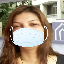

In [ ]:
import numpy as np
from keras.preprocessing import image

# Test on a single image
testImage = "/home/wasiq/Downloads/Mask/test/img_21/face.jpg"
test_image = image.load_img(testImage, target_size=(64, 64))
test_image

In [116]:
# Convert to array and add batch dimension
test_image_array = image.img_to_array(test_image)
print(f"Image array shape: {test_image_array.shape}\n")

test_image_array_exp_dim = np.expand_dims(test_image_array, axis=0)
print(f"Expanded array shape: {test_image_array_exp_dim.shape}\n")

# Predict
result = classifier.predict(test_image_array_exp_dim)
print(f"Raw prediction: {result}\n")
print(f"Result map: {ResultMap}\n")

# For binary classification with sigmoid, use threshold of 0.5
predicted_class = int(result[0][0] > 0.5)
print(f"Prediction: This is {ResultMap[predicted_class]}")

Image array shape: (64, 64, 3)

Expanded array shape: (1, 64, 64, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
Raw prediction: [[1.]]

Result map: {0: 'img_1', 1: 'img_10', 2: 'img_100', 3: 'img_1000', 4: 'img_1001', 5: 'img_1002', 6: 'img_1003', 7: 'img_1004', 8: 'img_1005', 9: 'img_1006', 10: 'img_1007', 11: 'img_1008', 12: 'img_1009', 13: 'img_101', 14: 'img_1010', 15: 'img_1011', 16: 'img_1012', 17: 'img_1013', 18: 'img_1014', 19: 'img_1015', 20: 'img_1016', 21: 'img_1017', 22: 'img_1018', 23: 'img_1019', 24: 'img_102', 25: 'img_1020', 26: 'img_1021', 27: 'img_1022', 28: 'img_1023', 29: 'img_1024', 30: 'img_1025', 31: 'img_1026', 32: 'img_1027', 33: 'img_1028', 34: 'img_1029', 35: 'img_103', 36: 'img_1030', 37: 'img_1031', 38: 'img_1032', 39: 'img_1033', 40: 'img_1034', 41: 'img_1035', 42: 'img_1036', 43: 'img_1037', 44: 'img_1038', 45: 'img_1039', 46: 'img_104', 47: 'img_1040', 48: 'img_1041', 49: 'img_1042', 50: 'img_1043', 51: 'img_1044', 52: 'img_1045', 53: 'img_1046', 54: 'img_1